In [1]:
import importlib
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.stats as stats

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import analysis

importlib.reload(analysis)

<module 'analysis' from '/home/masse/work/CellPainting/analysis.py'>

## Create dataset

In [8]:
# excel file with the plate schema
# i.e. file linking plate locations to drug/concentration codes
plate_schema_fn = "data/Plate_setup_SchemaA_11Dx3x7conc.xlsx"

# excel file with drug information
# i.e. file drug/concentration codes with drugs names and concentration values
drug_info_fn = "data/Drug_conditions.xlsx"

# plate directories
# each plate directory contains a txt file with phagocytosis data, and a txt file with Cell Painting data
plate_directories = [
    "data/DATA PLATE 1",
    "data/DATA PLATE 2",
    "data/DATA PLATE 3",
]

In [9]:
# create anndata structure

data = analysis.CreateData(
    plate_schema_fn,
    drug_info_fn,
    plate_directories,
)

data.create_anndata()

data/DATA PLATE 1
data/DATA PLATE 2
data/DATA PLATE 3


In [10]:
# first five wells
data.adata.obs.head(5)

Plate       Drug  Concentration  All Cells - Number of Objects  \
0  Plate 1   Riluzole           10.0                         2252.0   
1  Plate 1   Riluzole           10.0                         2421.0   
2  Plate 1   Riluzole           10.0                         2314.0   
3  Plate 1  Bisacodyl           10.0                         2631.0   
4  Plate 1  Bisacodyl           10.0                         2664.0   

   Non border cells - Number of Objects  \
0                                2067.0   
1                                2226.0   
2                                2140.0   
3                                2378.0   
4                                2465.0   

   Non border cells - Total Spot Area - Mean per Well  \
0                                         695.517151    
1                                         725.987427    
2                                         723.778015    
3                                         757.116455    
4                                         731.096985    

   Non border cells - Number of Spots - Mean per Well  \
0                                          11.887277    
1                                          13.280773    
2                                          12.677103    
3                                          13.841884    
4                                          13.652739    

   Spots Substrate - Spot Area [px²] - Mean per Well  \
0                                          58.509380   
1                                          54.664547   
2                                          57.093330   
3                                          54.697502   
4                                          53.549473   

   Spots Substrate - Relative Spot Intensity - Mean per Well  \
0                                           0.594058           
1                                           0.602326           
2                                           0.600240           
3                                           0.610978           
4                                           0.611548           

   Phagocytosis per cell  All Cells - Number of Objects normalized  \
0               0.005751                               -154.428467   
1               0.005966                                 14.571533   
2               0.005924                                -92.428467   
3               0.005821                                224.571533   
4               0.005539                                257.571533   

   Non border cells - Number of Objects normalized  \
0                                      -135.142822   
1                                        23.857178   
2                                       -62.142822   
3                                       175.857178   
4                                       262.857178   

   Non border cells - Total Spot Area - Mean per Well normalized  \
0                                         -17.948853               
1                                          12.521423               
2                                          10.312012               
3                                          43.650452               
4                                          17.630981               

   Non border cells - Number of Spots - Mean per Well normalized  \
0                                          -2.836205               
1                                          -1.442708               
2                                          -2.046378               
3                                          -0.881598               
4                                          -1.070743               

   Spots Substrate - Spot Area [px²] - Mean per Well normalized  \
0                                           9.921074              
1                                           6.076241              
2                                           8.505024              
3                                           6.109196              
4           

In [11]:
#target_name = "Phagocytosis per cell normalized"
#data.pls_regression(target_name)

In [12]:
phago_key = "Non border cells - Number of Spots - Mean per Well normalized"
phago_per_cell_key = "Phagocytosis per cell normalized"
object_count_key = "Non border cells - Number of Objects normalized"

## Plot dose-response curves

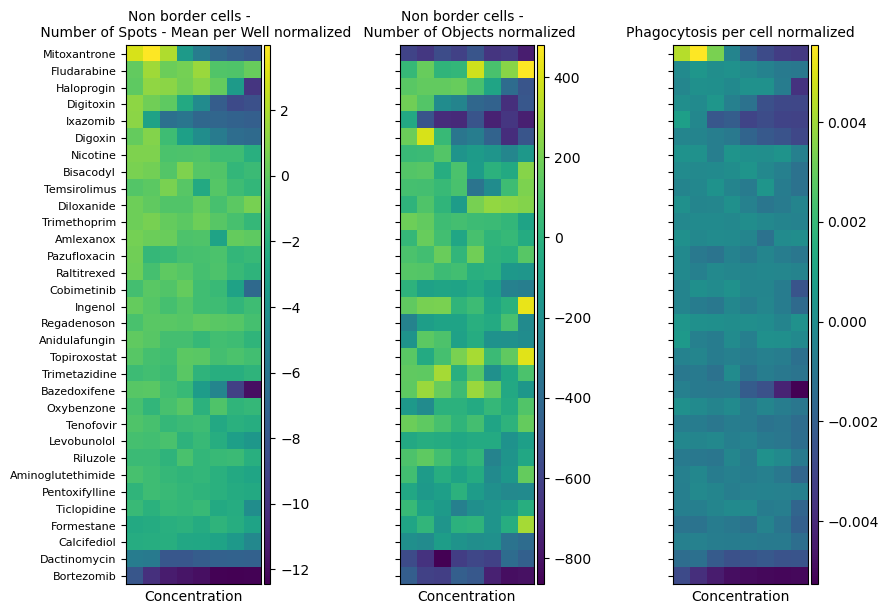

In [13]:
# normalize = True implies the response of c_aB_DM from the plate with associated drug is substrated from the response
idx_sort = data.plot_all_dose_responses(normalized=True)

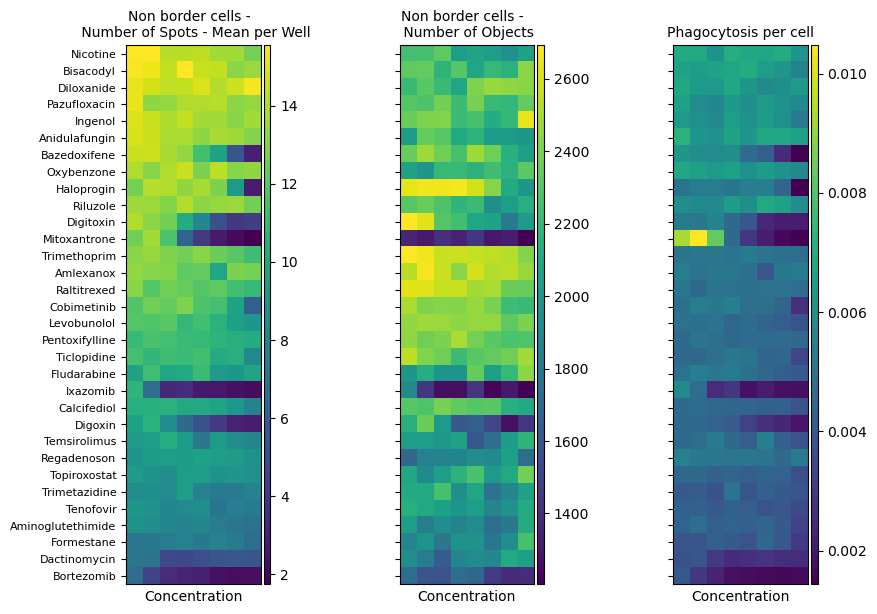

array([ 3,  1,  6,  4,  7,  2,  8,  5, 31,  0, 30, 18, 29, 27, 28, 25, 22,
       24, 21, 19, 16, 23, 20, 17, 15, 14, 13, 11, 10, 12, 26,  9])

In [14]:
data.plot_all_dose_responses(normalized=False)

## Features most correlated with phagocytosis

In [15]:
# phagocytosis key
key = "Non border cells - Number of Spots - Mean per Well"


n = data.adata.X.shape[1] # number of cell painting features
R = np.zeros(n)
for i in range(n):
    R[i], _ = stats.pearsonr(data.adata.X[:, i], data.adata.obs[key].values)
    

idx = np.argsort(R)

print(f"Features most negatively correlated with {key}")
print()
for i in idx[:20]:
    print(f"{data.adata.var.feature.values[i][18:]}, R = {R[i]:1.3f}")
print()
print(f"Features most positively correlated with {key}")
print()
for i in idx[-20:]:
    print(f"{data.adata.var.feature.values[i][18:]}, R = {R[i]:1.3f}")

Features most negatively correlated with Non border cells - Number of Spots - Mean per Well

Ring Region PhenoVue Fluor 555 Symmetry 05 SER-Dark - Mean per Well, R = -0.552
Ring Region PhenoVue Fluor 555 Symmetry 05 SER-Valley - Mean per Well, R = -0.551
Ring Region PhenoVue Fluor 555 Symmetry 04 SER-Hole - Mean per Well, R = -0.551
Ring Region PhenoVue Fluor 555 Symmetry 15 SER-Dark - Mean per Well, R = -0.549
Ring Region PhenoVue Fluor 555 Symmetry 14 SER-Hole - Mean per Well, R = -0.549
Ring Region PhenoVue Fluor 555 Symmetry 03 SER-Valley - Mean per Well, R = -0.548
Ring Region PhenoVue Fluor 555 Symmetry 15 SER-Valley - Mean per Well, R = -0.548
Ring Region PhenoVue Fluor 555 Symmetry 03 SER-Dark - Mean per Well, R = -0.548
Ring Region PhenoVue Fluor 555 Symmetry 05 SER-Hole - Mean per Well, R = -0.547
Ring Region PhenoVue Fluor 555 Symmetry 15 SER-Hole - Mean per Well, R = -0.546
Ring Region PhenoVue Fluor 555 Symmetry 13 SER-Dark - Mean per Well, R = -0.546
Ring Region PhenoVue 

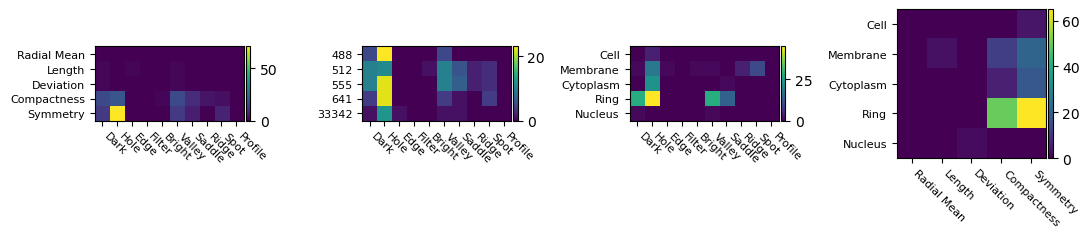

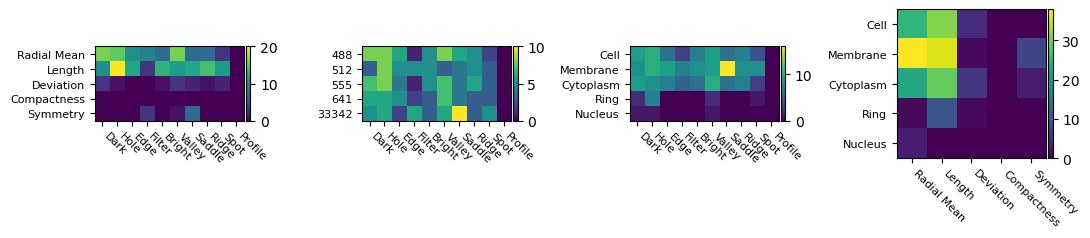

In [16]:
# visualizing how often each feature name appears in the top N=250 most positively and negatively correlated features
N = 250

# negatively correlated
features = [data.adata.var.feature.values[i] for i in idx[:N]]
data.plot_feature_counts(features)

# positively correlated
features = [data.adata.var.feature.values[i] for i in idx[-N:]]
data.plot_feature_counts(features)

In [17]:
# same as above, but using the normalized phagocytosis feature
key = "Non border cells - Number of Spots - Mean per Well normalized"

n = data.adata.X.shape[1]
R = np.zeros(n)
for i in range(n):
    R[i], _ = stats.pearsonr(data.adata.X[:, i], data.adata.obs[key].values)
    

idx = np.argsort(R)

print(f"Features most negatively correlated with {key}")
for i in idx[:20]:
    print(f"{data.adata.var.feature.values[i][18:]}, R = {R[i]:1.3f}")
print()
print(f"Features most positively correlated with {key}")
for i in idx[-20:]:
    print(f"{data.adata.var.feature.values[i][18:]}, R = {R[i]:1.3f}")


Features most negatively correlated with Non border cells - Number of Spots - Mean per Well normalized
Ring Region PhenoVue Fluor 555 Symmetry 05 SER-Hole - Mean per Well, R = -0.630
Ring Region PhenoVue Fluor 555 Symmetry 05 SER-Dark - Mean per Well, R = -0.629
Ring Region PhenoVue Fluor 555 Symmetry 05 SER-Valley - Mean per Well, R = -0.629
Ring Region PhenoVue Fluor 555 Symmetry 15 SER-Hole - Mean per Well, R = -0.628
Ring Region PhenoVue 512 Nucleic acid stain Symmetry 05 SER-Dark - Mean per Well, R = -0.628
Ring Region PhenoVue Fluor 555 Symmetry 04 SER-Hole - Mean per Well, R = -0.627
Ring Region PhenoVue Fluor 555 Symmetry 03 SER-Valley - Mean per Well, R = -0.626
Ring Region PhenoVue 512 Nucleic acid stain Symmetry 05 SER-Hole - Mean per Well, R = -0.625
Ring Region PhenoVue 512 Nucleic acid stain Symmetry 03 SER-Valley - Mean per Well, R = -0.625
Ring Region PhenoVue 512 Nucleic acid stain Symmetry 05 SER-Valley - Mean per Well, R = -0.625
Ring Region PhenoVue 512 Nucleic acid

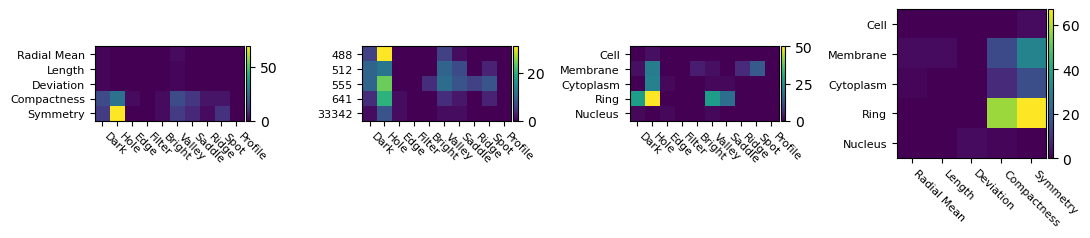

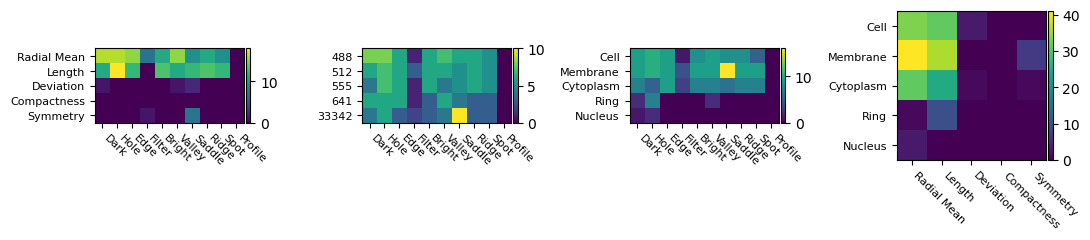

In [18]:
# visualizing how often each feature name appears in the top N=250 most positively and negatively correlated features
N = 250

# negatively correlated
features = [data.adata.var.feature.values[i] for i in idx[:N]]
data.plot_feature_counts(features)

# positively correlated
features = [data.adata.var.feature.values[i] for i in idx[-N:]]
data.plot_feature_counts(features)

## Individual dose-response curves

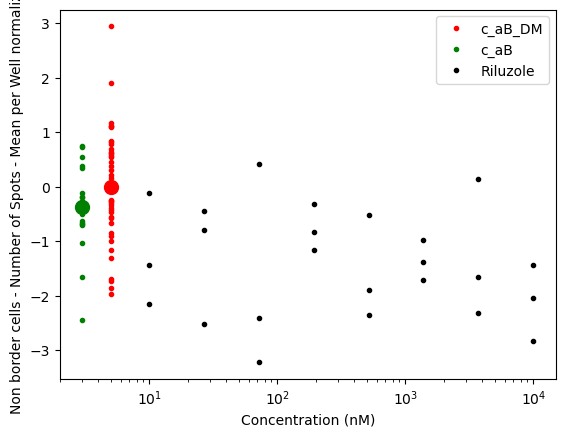

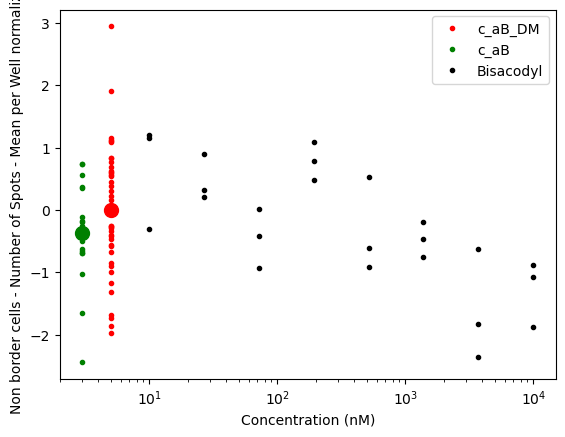

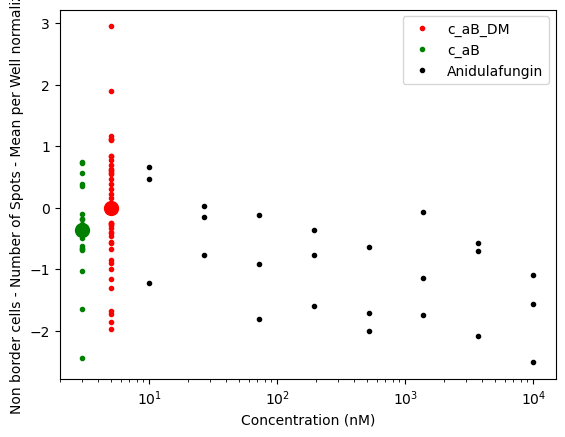

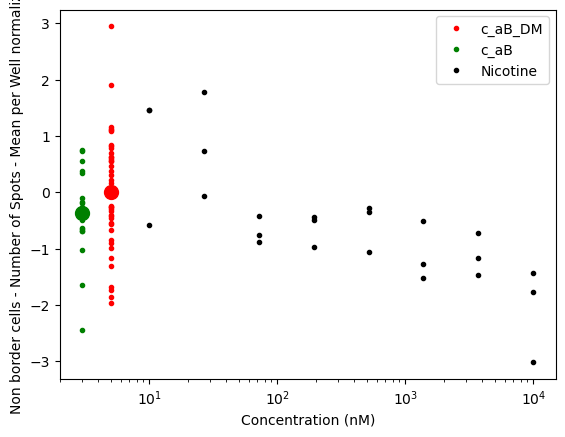

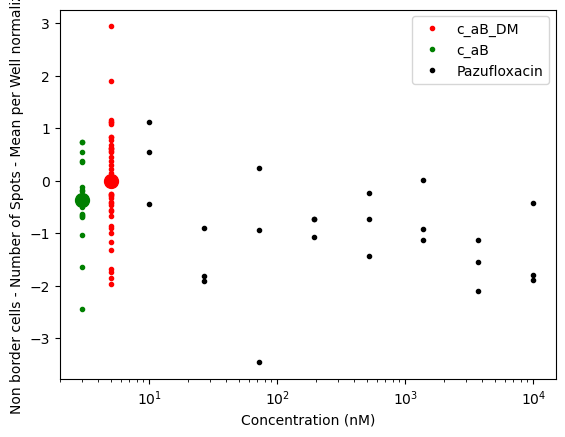

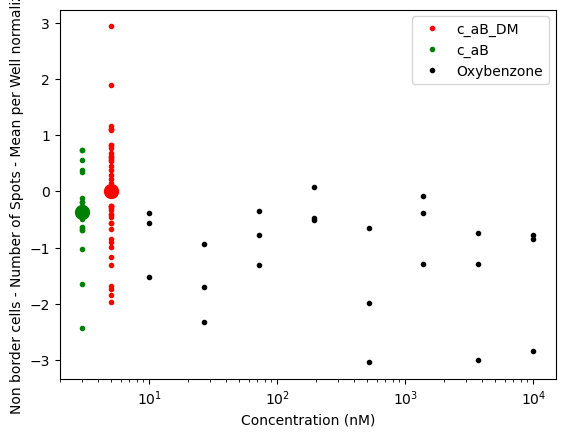

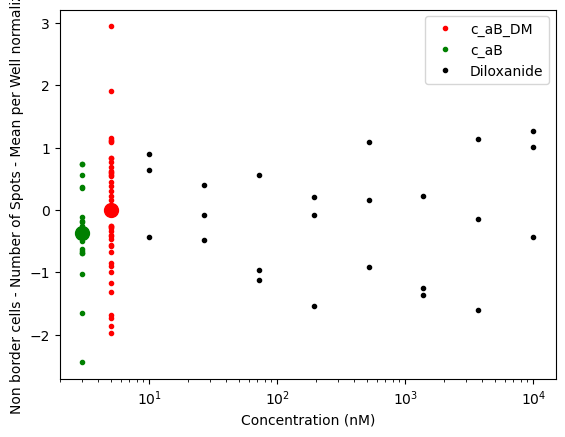

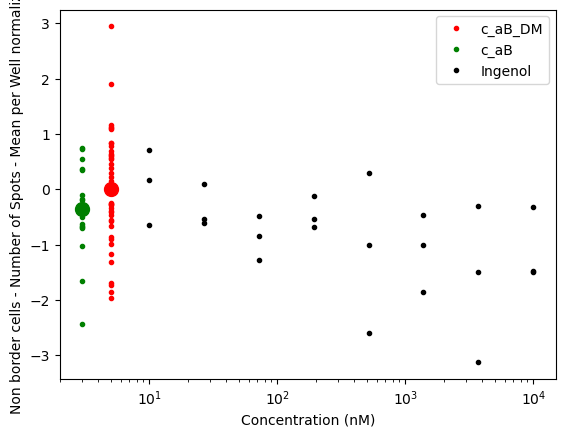

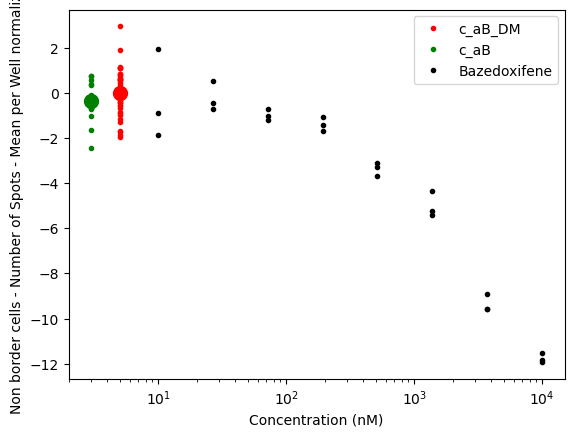

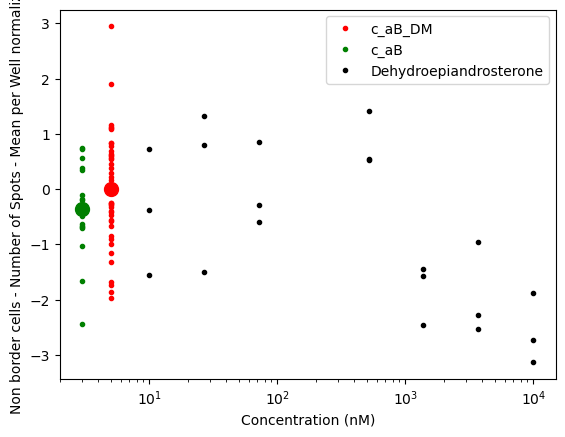

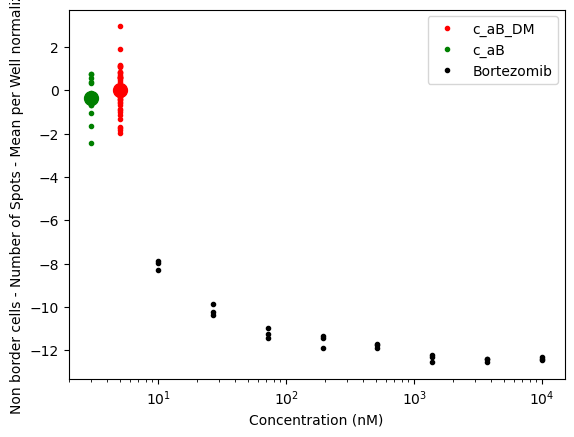

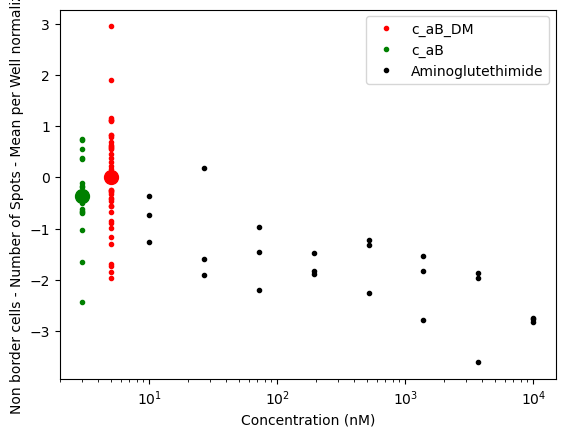

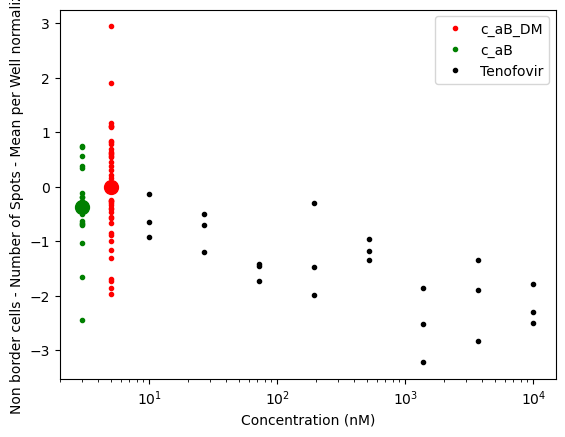

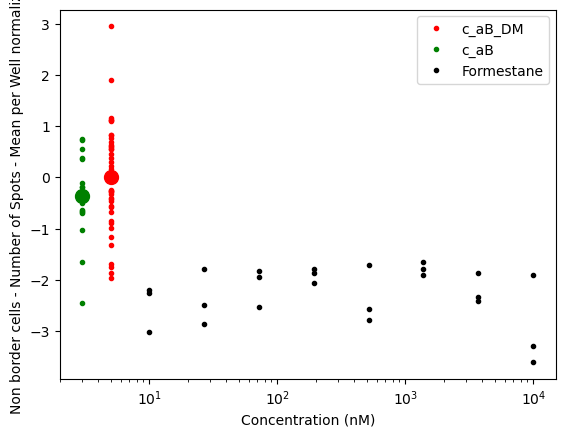

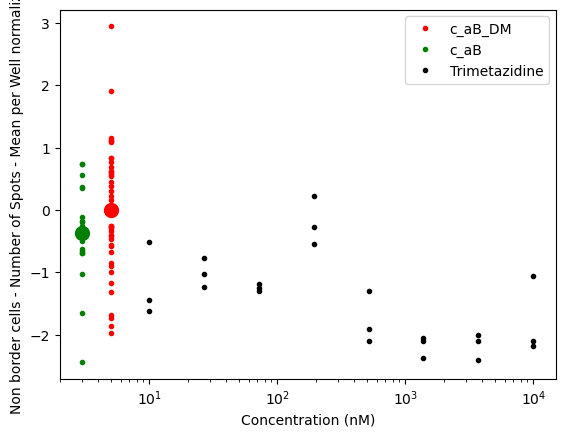

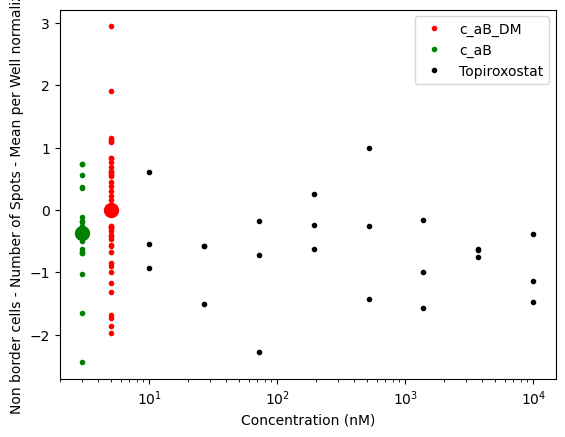

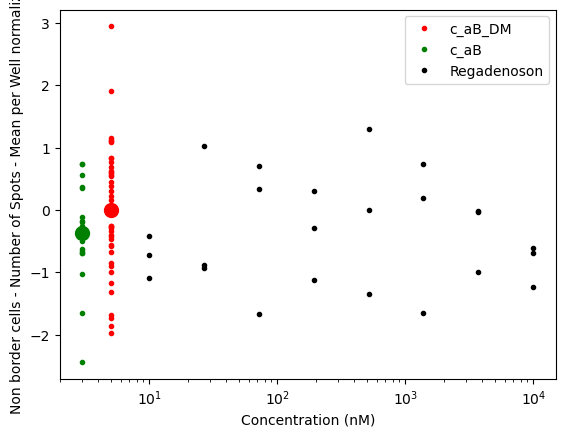

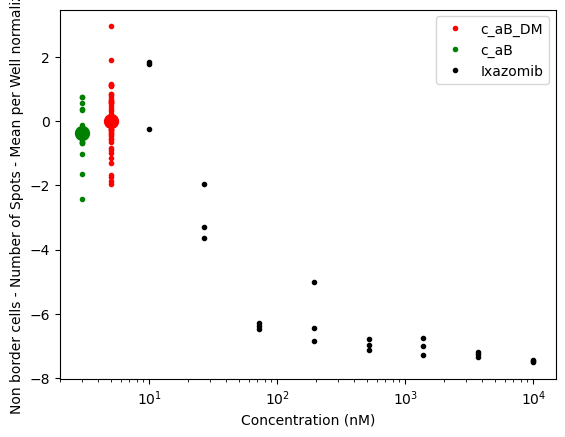

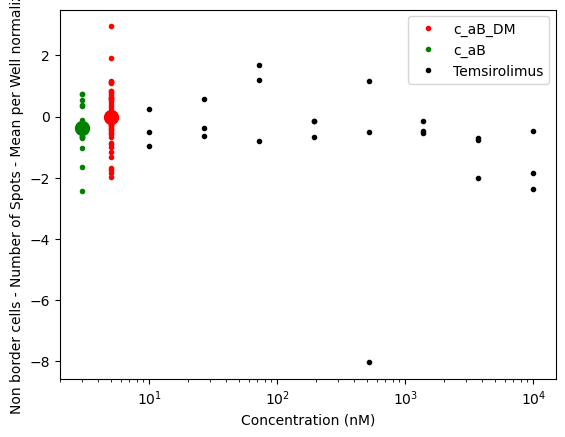

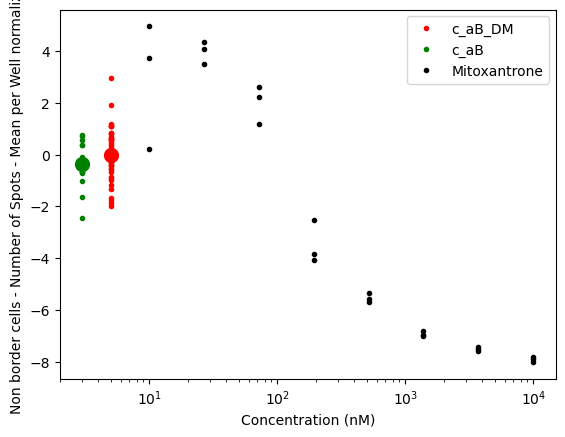

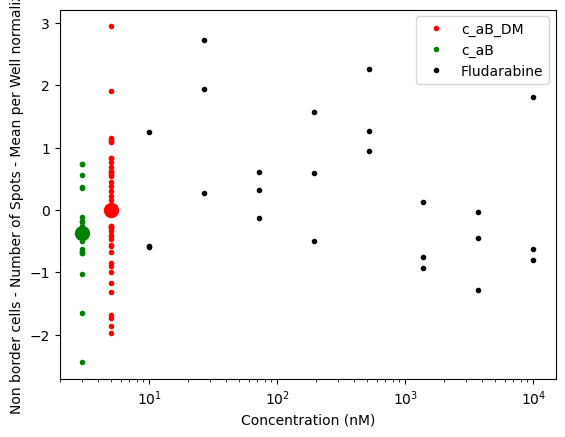

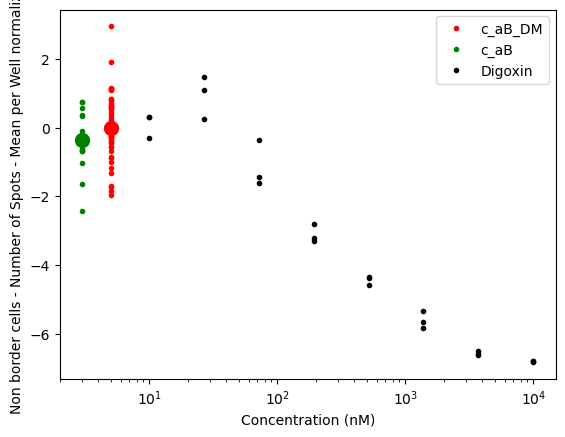

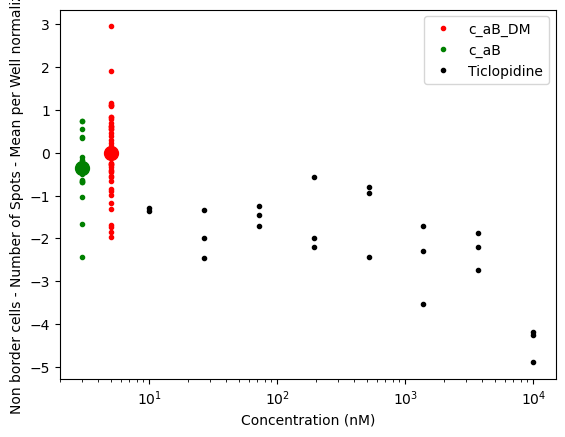

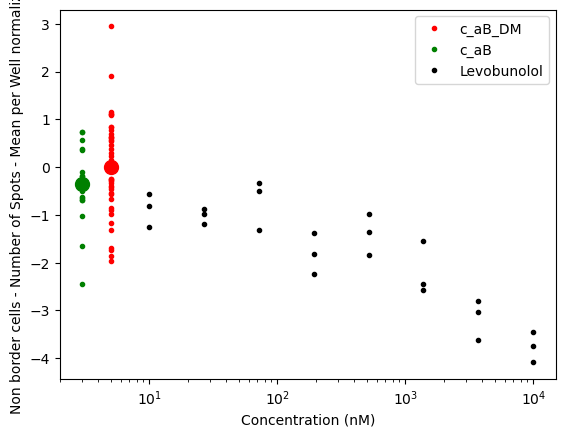

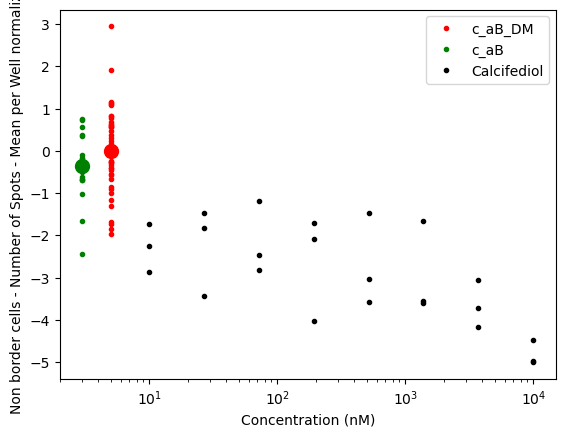

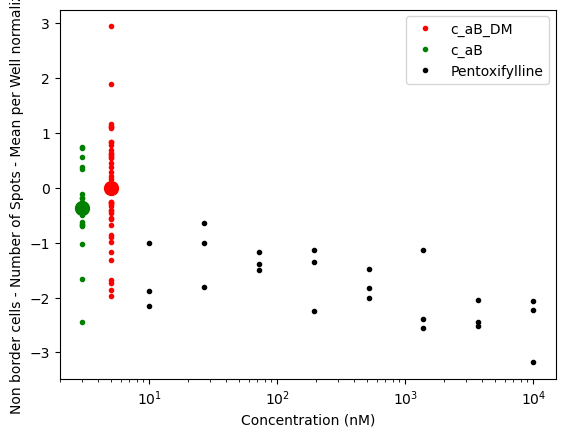

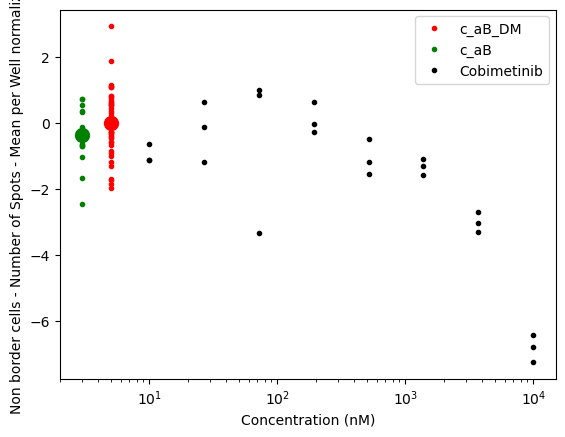

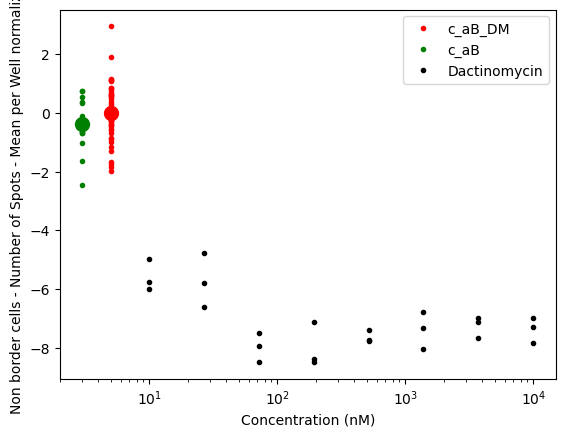

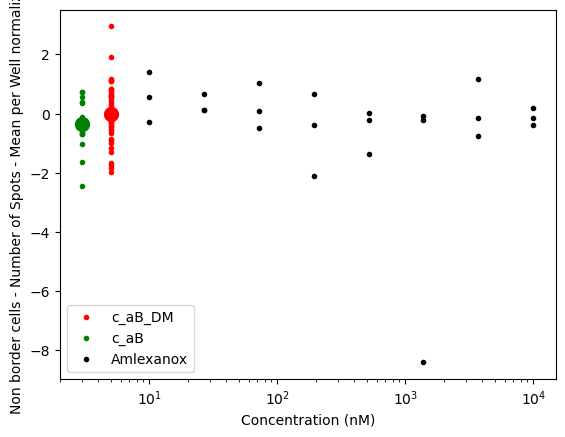

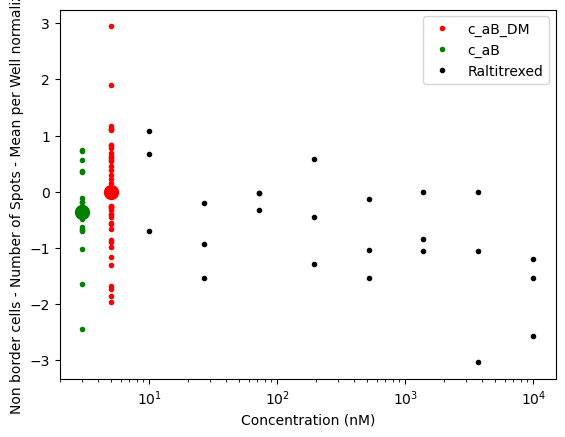

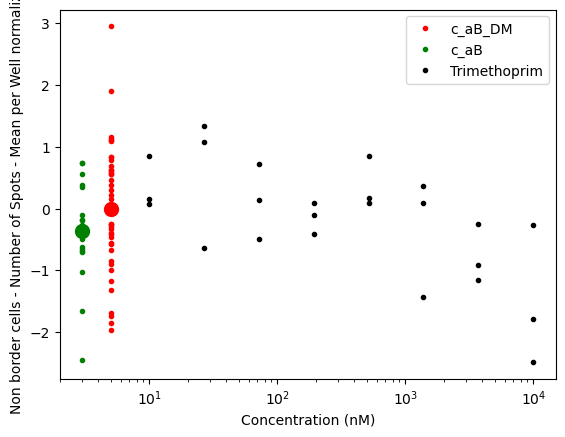

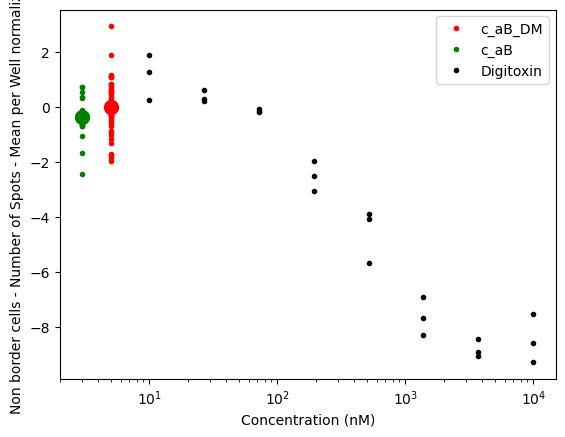

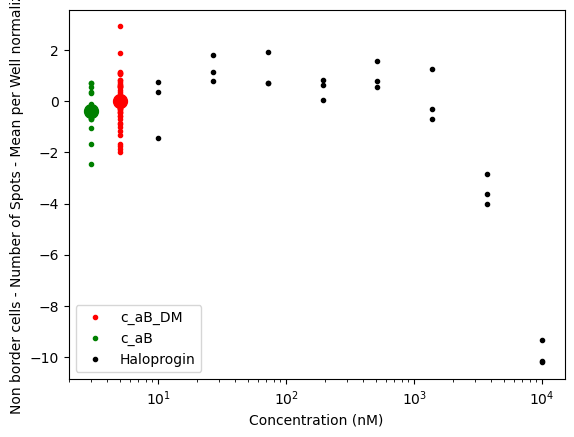

In [19]:
# phagocytosis dose-response curves
key = "Non border cells - Number of Spots - Mean per Well normalized"
drugs = data.adata.obs.Drug.unique()
for d in drugs:
    try:
        if not d.startswith("c"): # don't plot controls
            data.plot_dose_response(d, k=key)
    except:
        continue

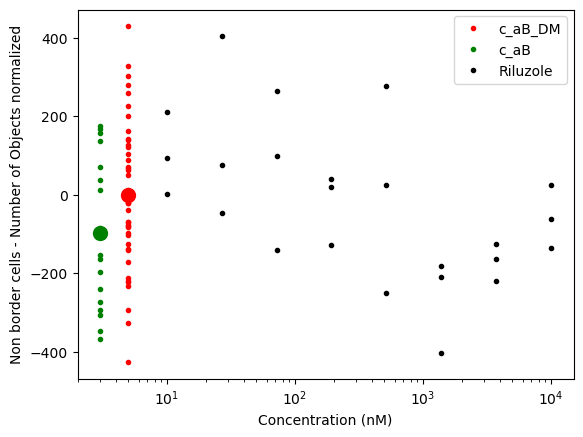

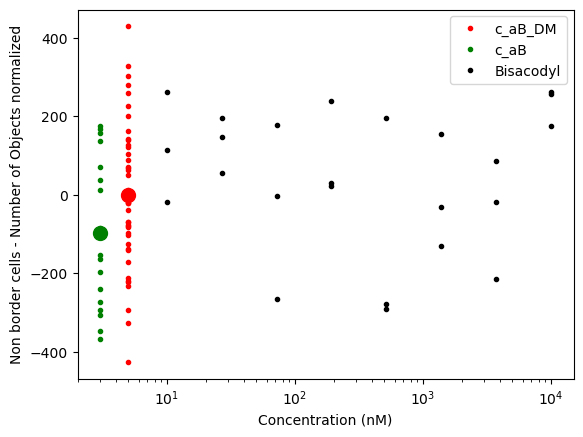

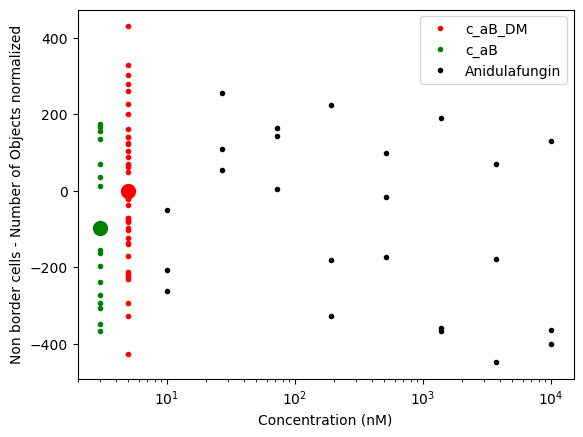

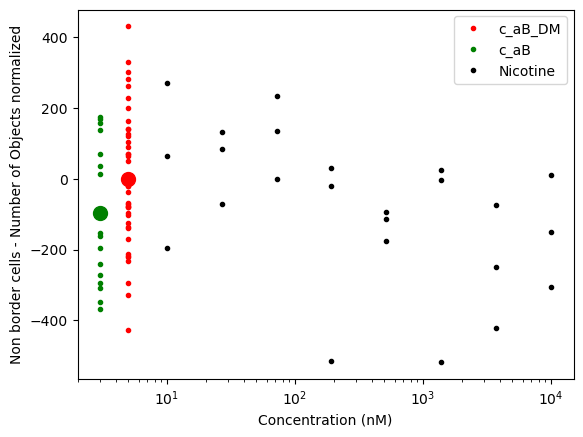

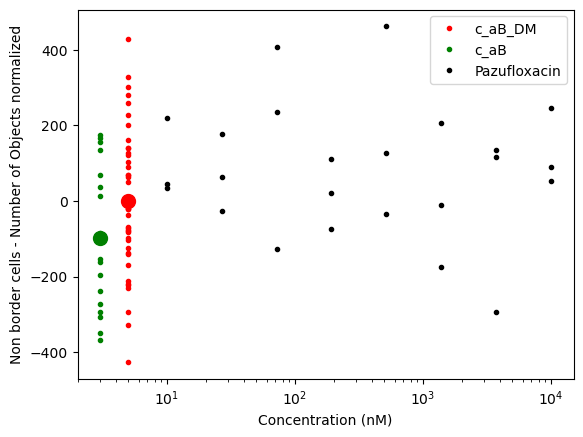

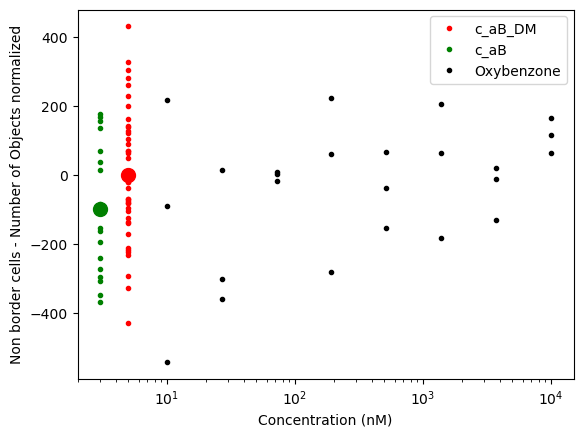

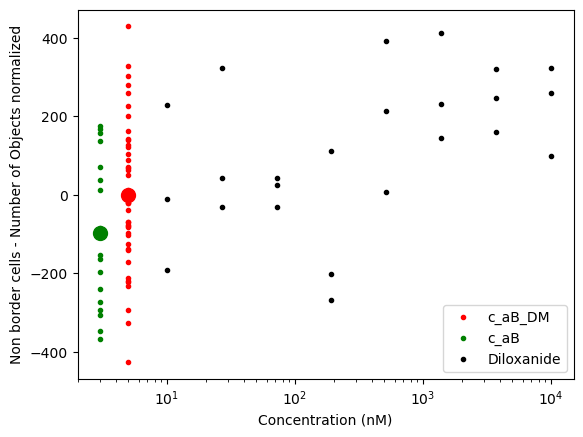

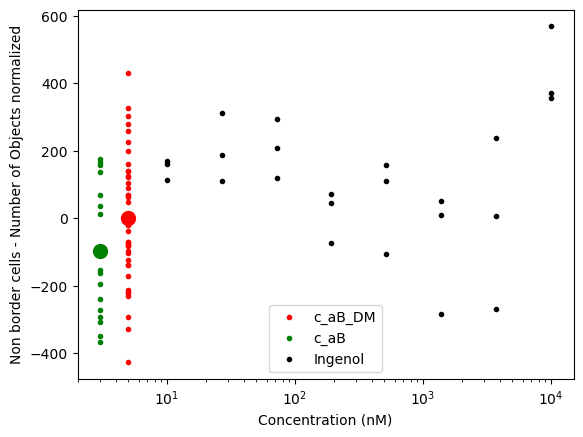

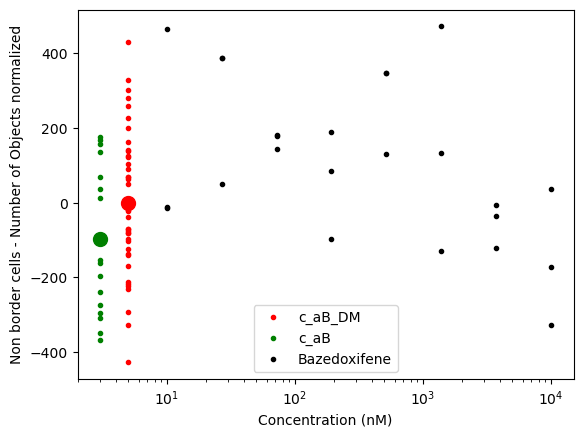

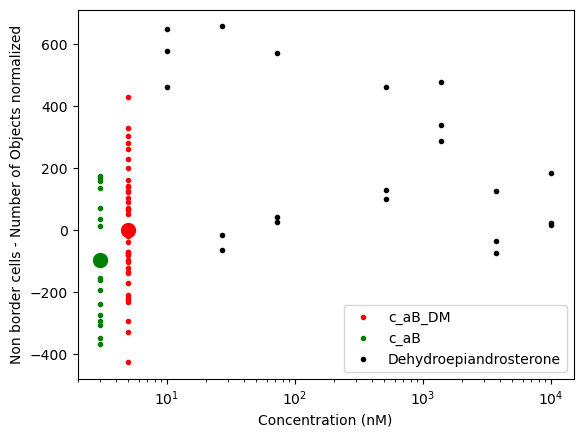

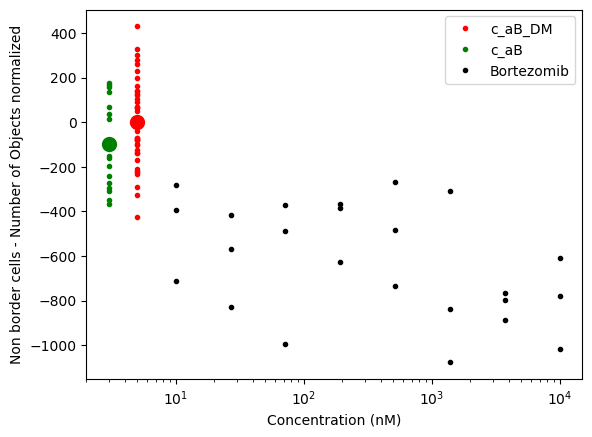

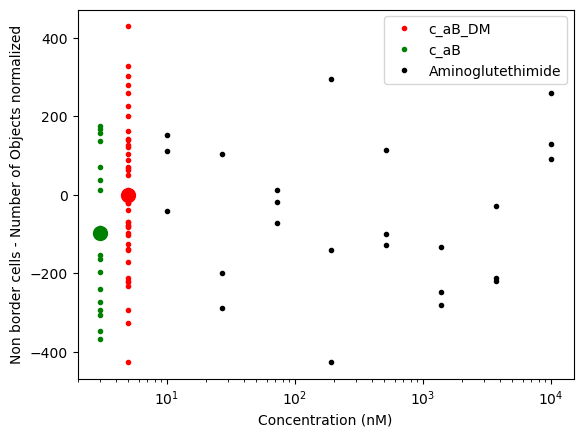

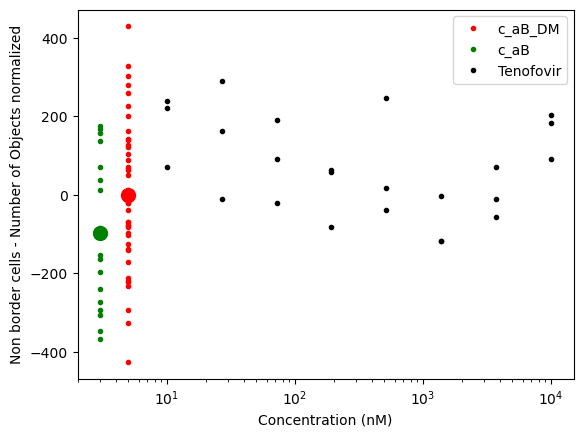

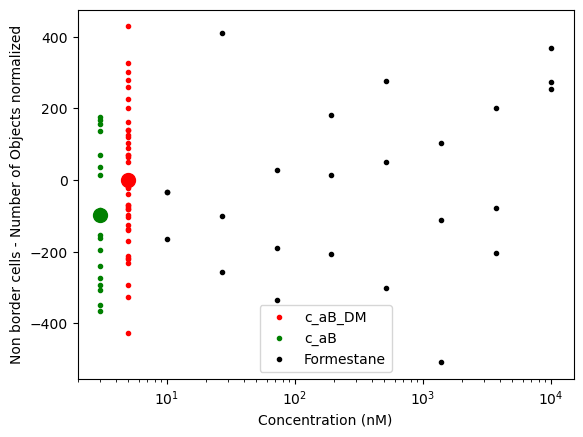

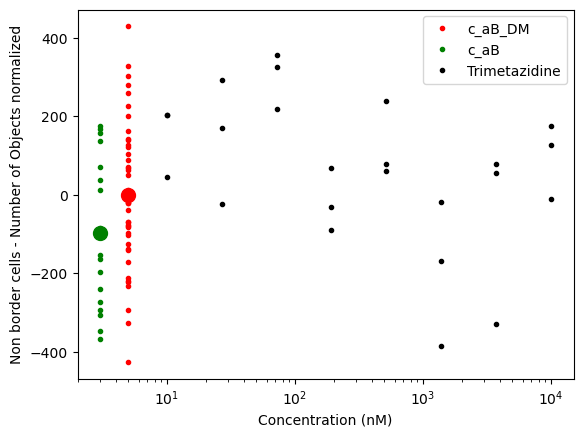

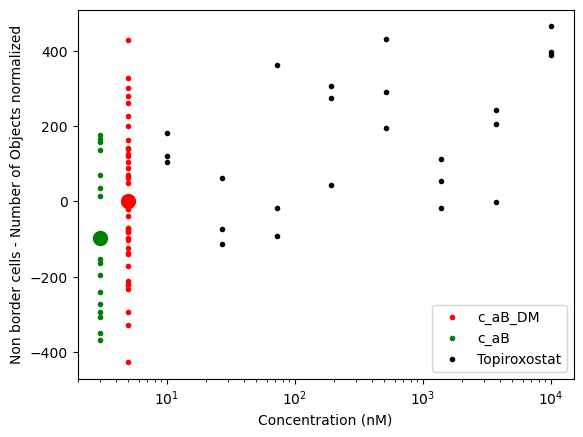

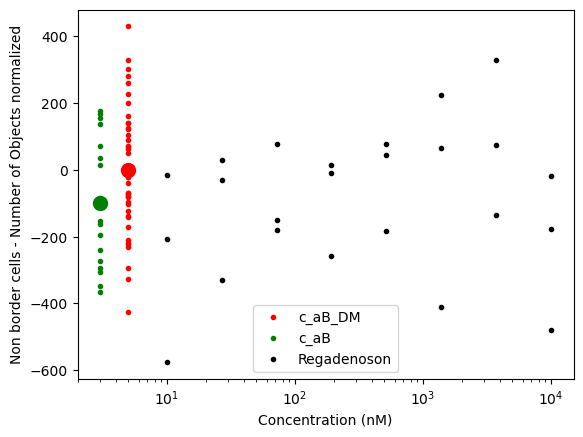

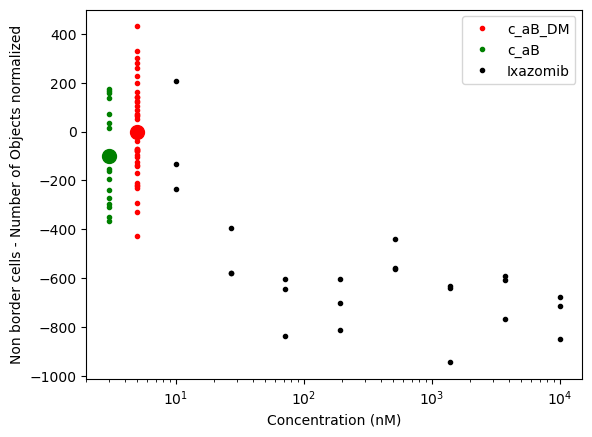

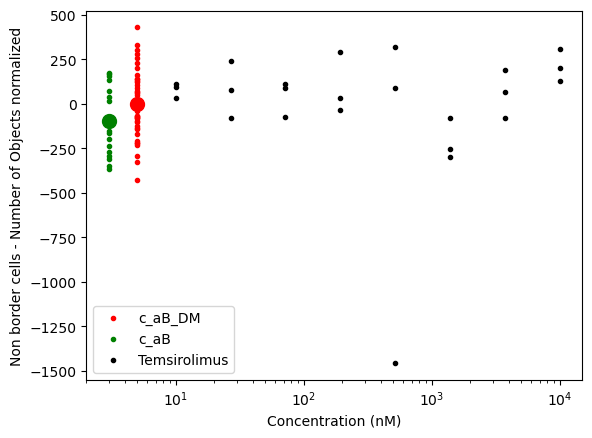

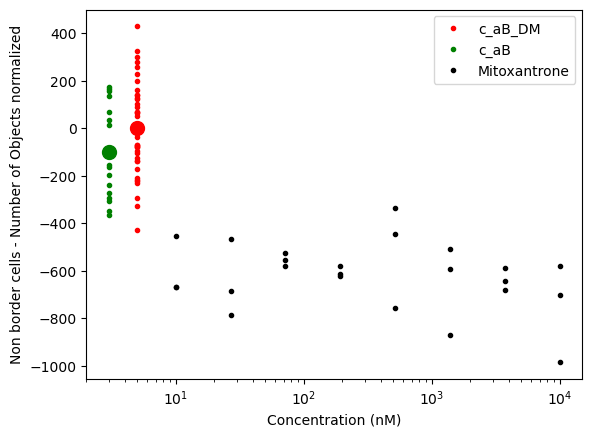

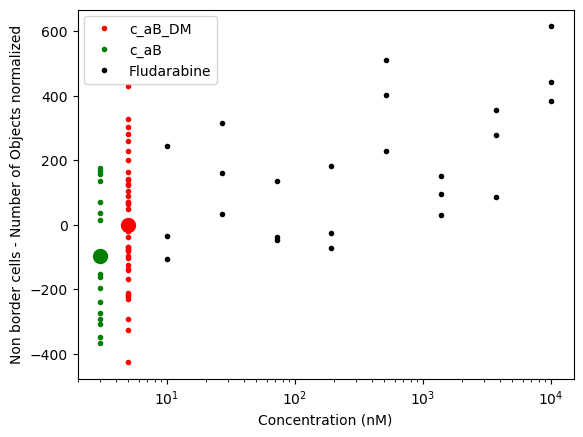

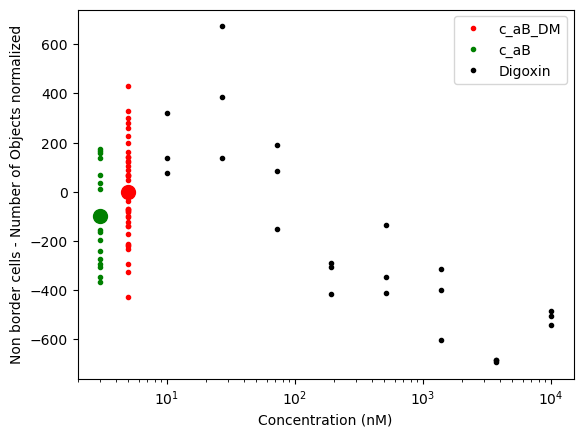

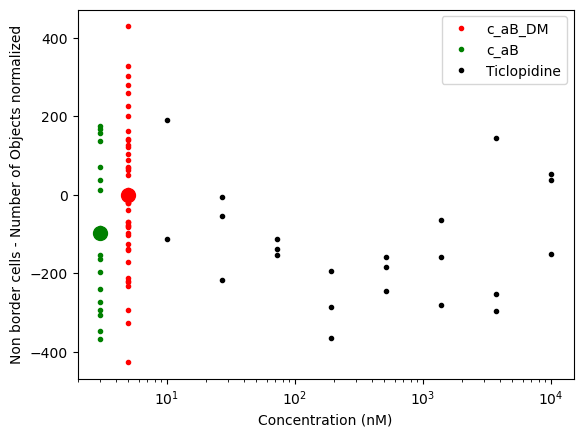

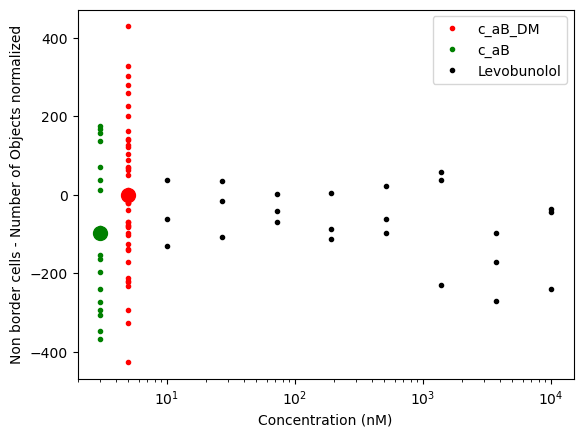

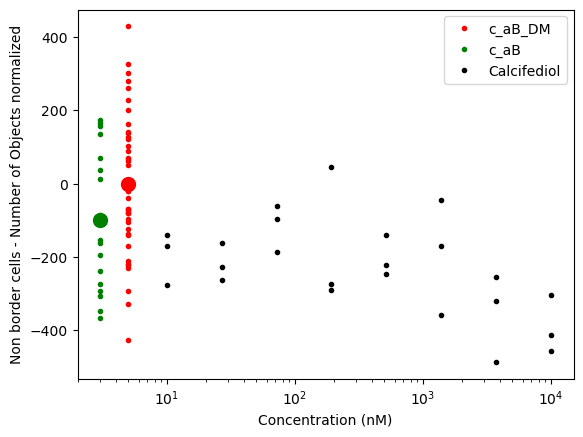

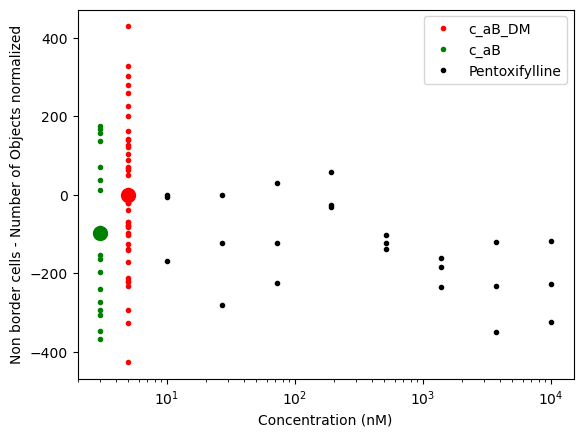

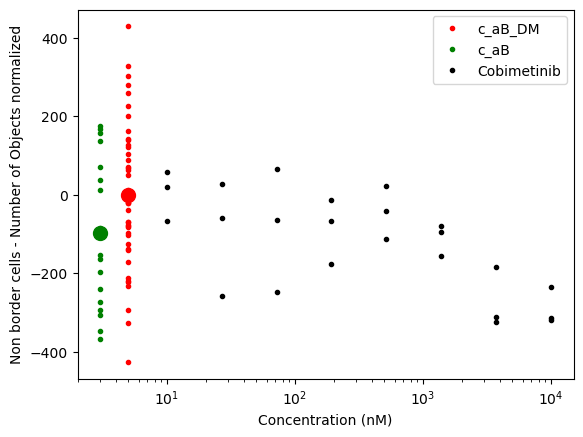

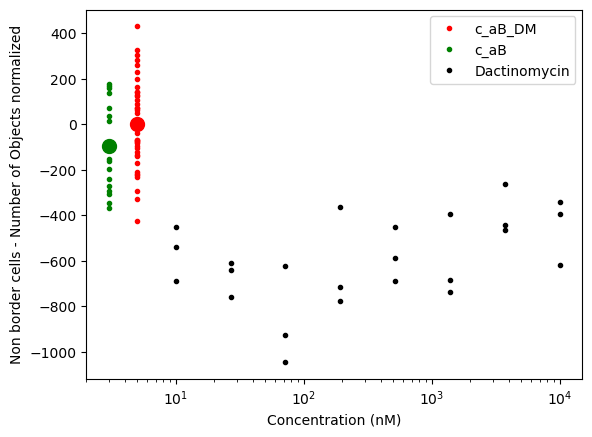

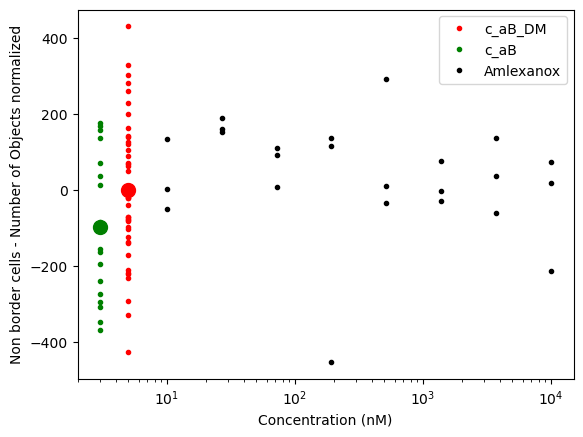

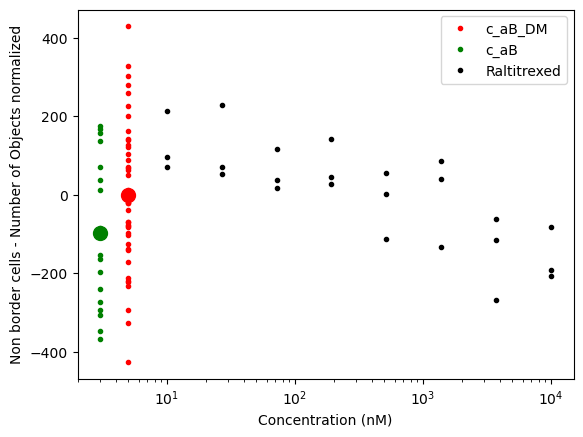

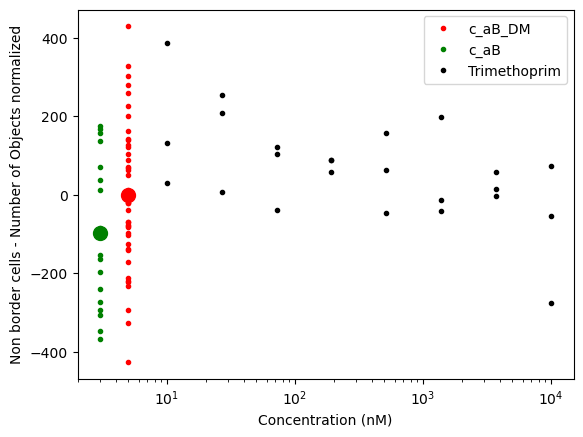

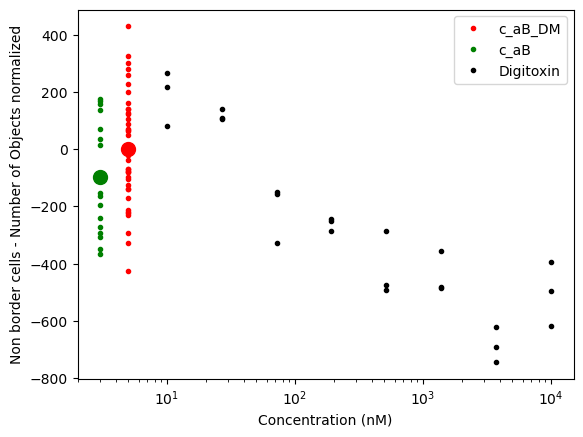

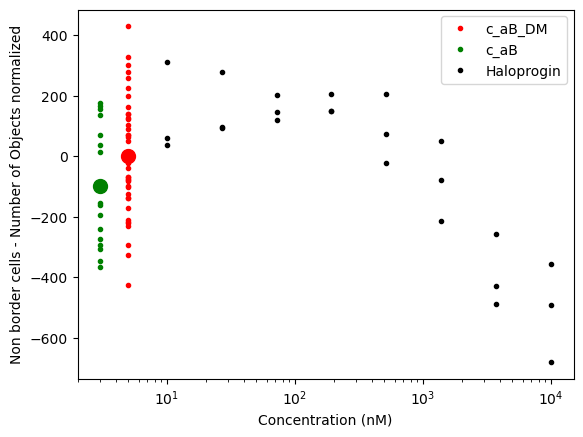

In [20]:
# number of objects (i.e. cells) dose-response curves
key = "Non border cells - Number of Objects normalized"

drugs = data.adata.obs.Drug.unique()
for d in drugs:
    try:
        if not d.startswith("c"): # don't plot controls
            data.plot_dose_response(d, k=key)
    except:
        continue

## PCA and UMAP plots

In [22]:
adata = data.adata

sc.pp.pca(adata, layer="X_norm", n_comps=30)
sc.pp.neighbors(adata, n_neighbors=15)
sc.tl.umap(adata)

/home/masse/miniconda3/envs/scanpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
#adata.obsm["X_pca"] = data.x_pls
#sc.pp.neighbors(adata, use_rep = "X_pls", n_neighbors=15)
#sc.tl.umap(adata)

AttributeError: 'CreateData' object has no attribute 'x_pls'

In [27]:
adata.obs["Mitoxantrone"] = adata.obs.Drug == "Mitoxantrone"
#sc.pl.embedding(adata, color=["Drug", "Mitoxantrone", phago_key], ncols=1)

TypeError: embedding() missing 1 required positional argument: 'basis'

In [29]:
sc.tl.leiden(adata, resolution=0.05)

/tmp/ipykernel_1021766/932759822.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.05)


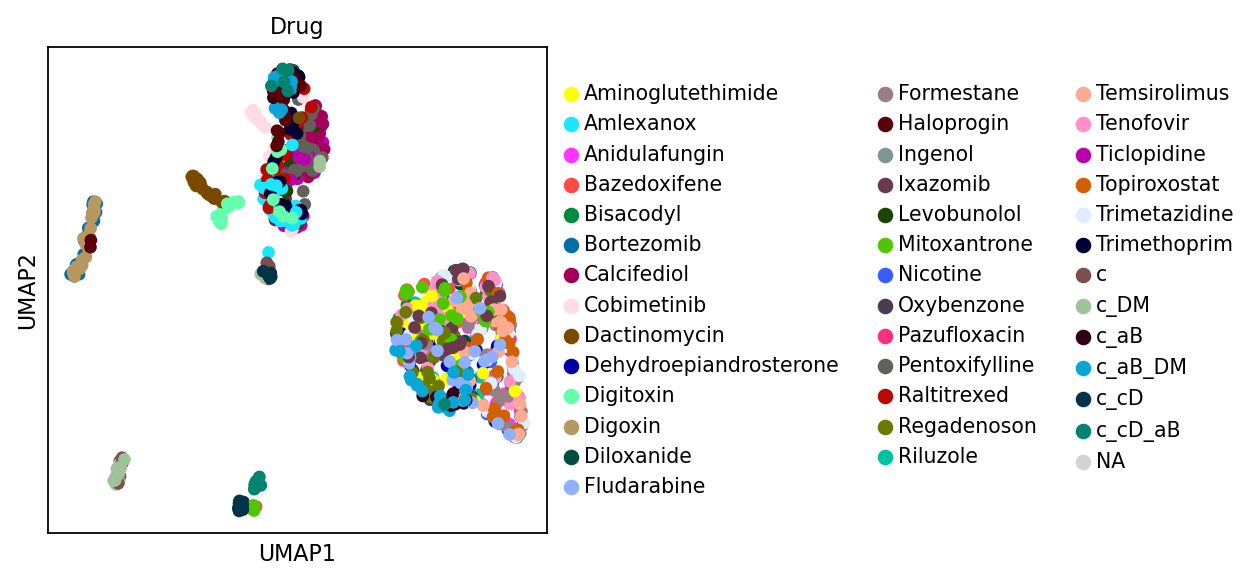

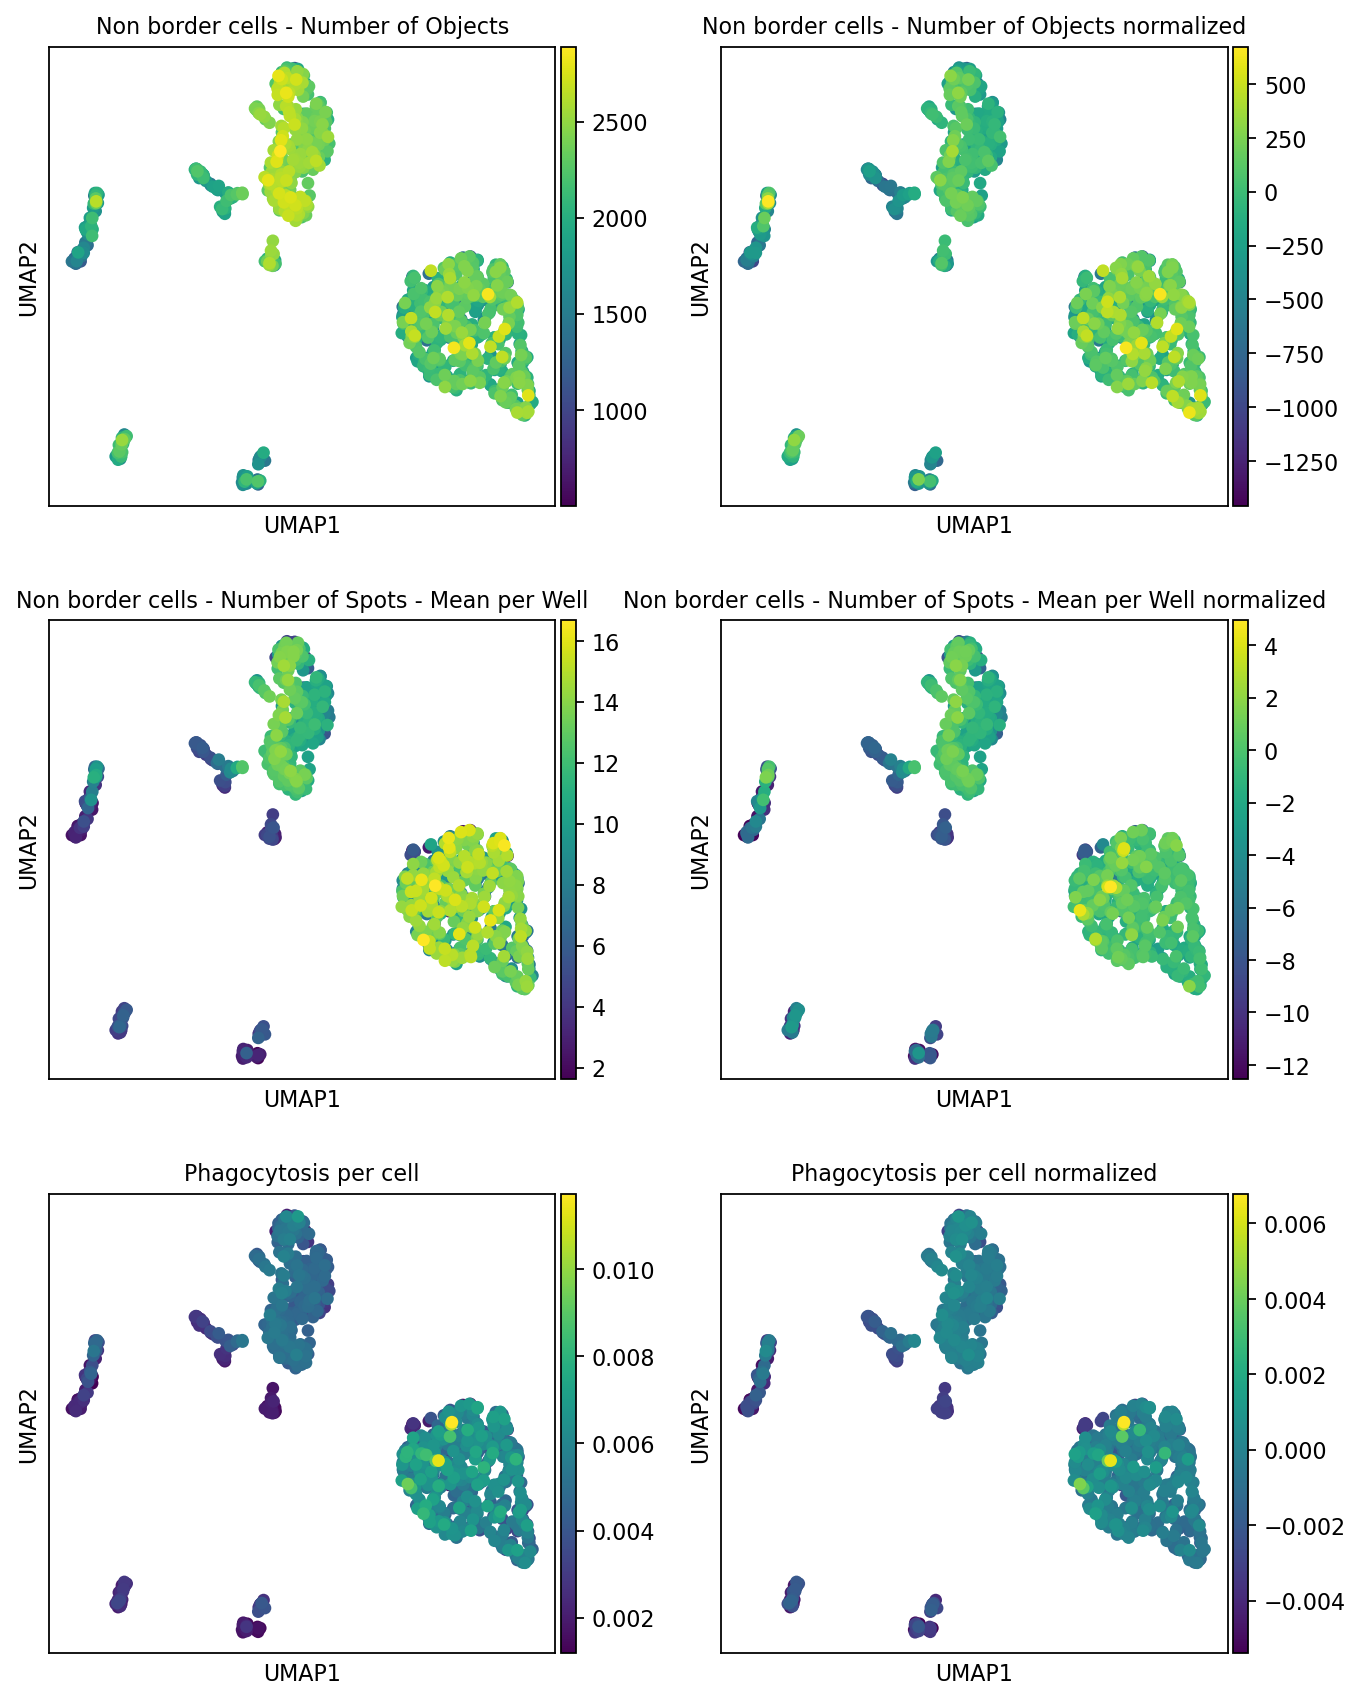

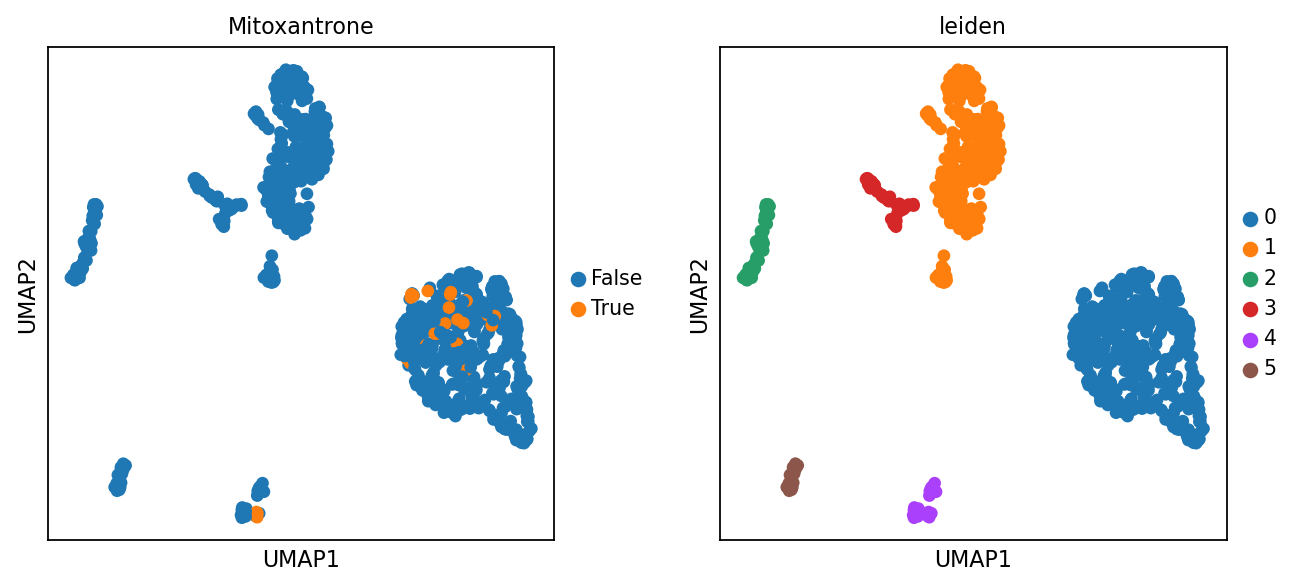

In [30]:

sc.set_figure_params(figsize=(1.5*3., 1.5*1.5))
sc.set_figure_params(fontsize=10)
adata.obs["Mitoxantrone"] = adata.obs.Drug == "Mitoxantrone"
sc.pl.umap(adata, color=["Drug"], ncols=2)


sc.set_figure_params(figsize=(3., 1.))
sc.set_figure_params(fontsize=10)
sc.pl.umap(adata, color=[
    "Non border cells - Number of Objects", 
    "Non border cells - Number of Objects normalized",
    "Non border cells - Number of Spots - Mean per Well", 
    "Non border cells - Number of Spots - Mean per Well normalized",
    "Phagocytosis per cell",
    "Phagocytosis per cell normalized",
    
], ncols=2)

sc.pl.umap(adata, color=[
    "Mitoxantrone",  "leiden",
], ncols=3)

## Scatter plots of phagocytosis (number of spots) and cell health (number of objects)

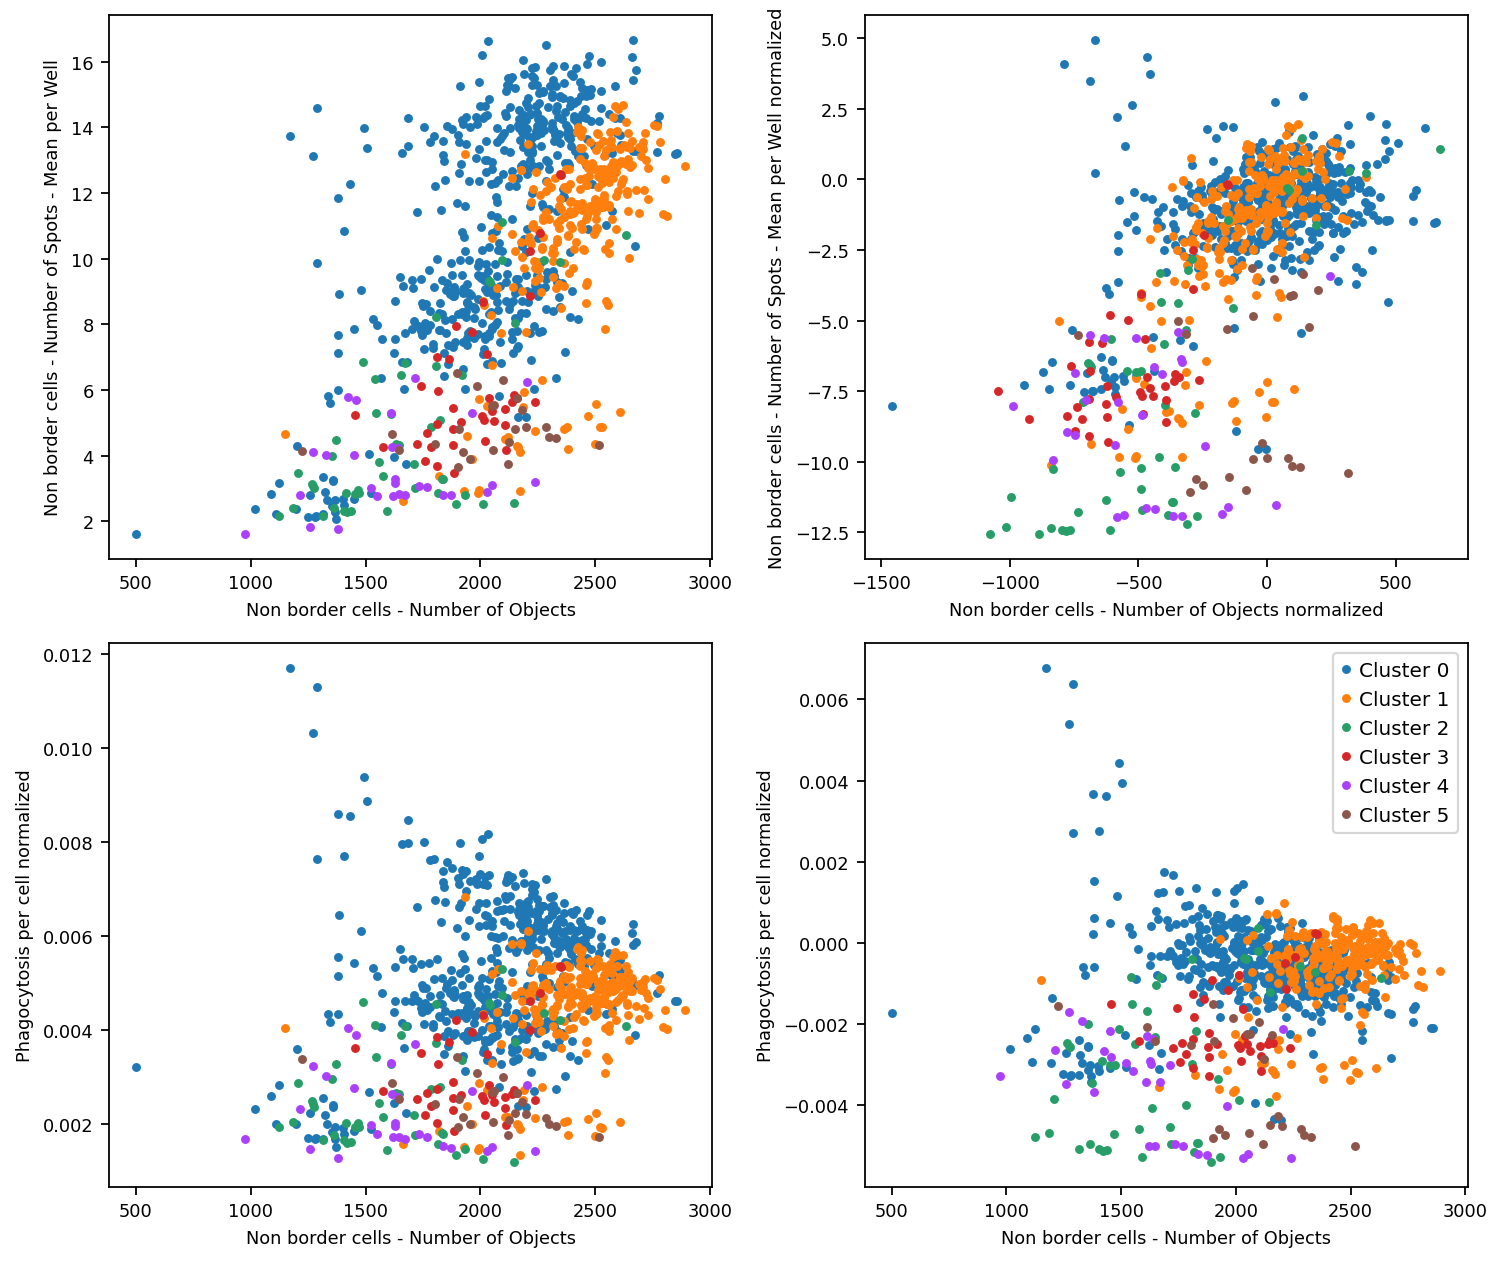

In [31]:
f, ax = plt.subplots(2, 2, figsize=(9.5, 8))
fs = 8

for n in range(6):
    idx = adata.obs.leiden == str(n)   
    ax[0, 0].plot(
        data.adata.obs["Non border cells - Number of Objects"].values[idx], 
        data.adata.obs["Non border cells - Number of Spots - Mean per Well"].values[idx], 
        '.',
        label = f"Cluster {n}",
    )
    ax[0, 0].set_xlabel("Non border cells - Number of Objects", fontsize=fs)
    ax[0, 0].set_ylabel("Non border cells - Number of Spots - Mean per Well", fontsize=fs)

    ax[0, 1].plot(
        data.adata.obs["Non border cells - Number of Objects normalized"].values[idx], 
        data.adata.obs["Non border cells - Number of Spots - Mean per Well normalized"].values[idx], 
        '.',
        label = f"Cluster {n}",
    )
    ax[0, 1].set_xlabel("Non border cells - Number of Objects normalized", fontsize=fs)
    ax[0, 1].set_ylabel("Non border cells - Number of Spots - Mean per Well normalized", fontsize=fs)

    ax[1, 0].plot(
        data.adata.obs["Non border cells - Number of Objects"].values[idx], 
        data.adata.obs["Phagocytosis per cell"].values[idx], 
        '.',
        label = f"Cluster {n}",
    )
    ax[1, 0].set_xlabel("Non border cells - Number of Objects", fontsize=fs)
    ax[1, 0].set_ylabel(phago_per_cell_key, fontsize=fs)

    ax[1, 1].plot(
        data.adata.obs["Non border cells - Number of Objects"].values[idx], 
        data.adata.obs[phago_per_cell_key].values[idx], 
        '.',
        label = f"Cluster {n}",
    )
    ax[1, 1].set_xlabel("Non border cells - Number of Objects", fontsize=fs)
    ax[1, 1].set_ylabel(phago_per_cell_key, fontsize=fs)

for n in range(4):
    j = (n // 2, n % 2)
    ax[j].tick_params(axis='x', labelsize=8)
    ax[j].tick_params(axis='y', labelsize=8)
    ax[j].grid(False)
    
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


## PCA and UMAP visualization of cluster 0 - the cluster containing Mitoxantrone

In [32]:
adata0 = adata[adata.obs.leiden == "0"]
sc.pp.pca(adata0, n_comps=30)
sc.pp.neighbors(adata0, n_neighbors=5)
sc.tl.umap(adata0)

/home/masse/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


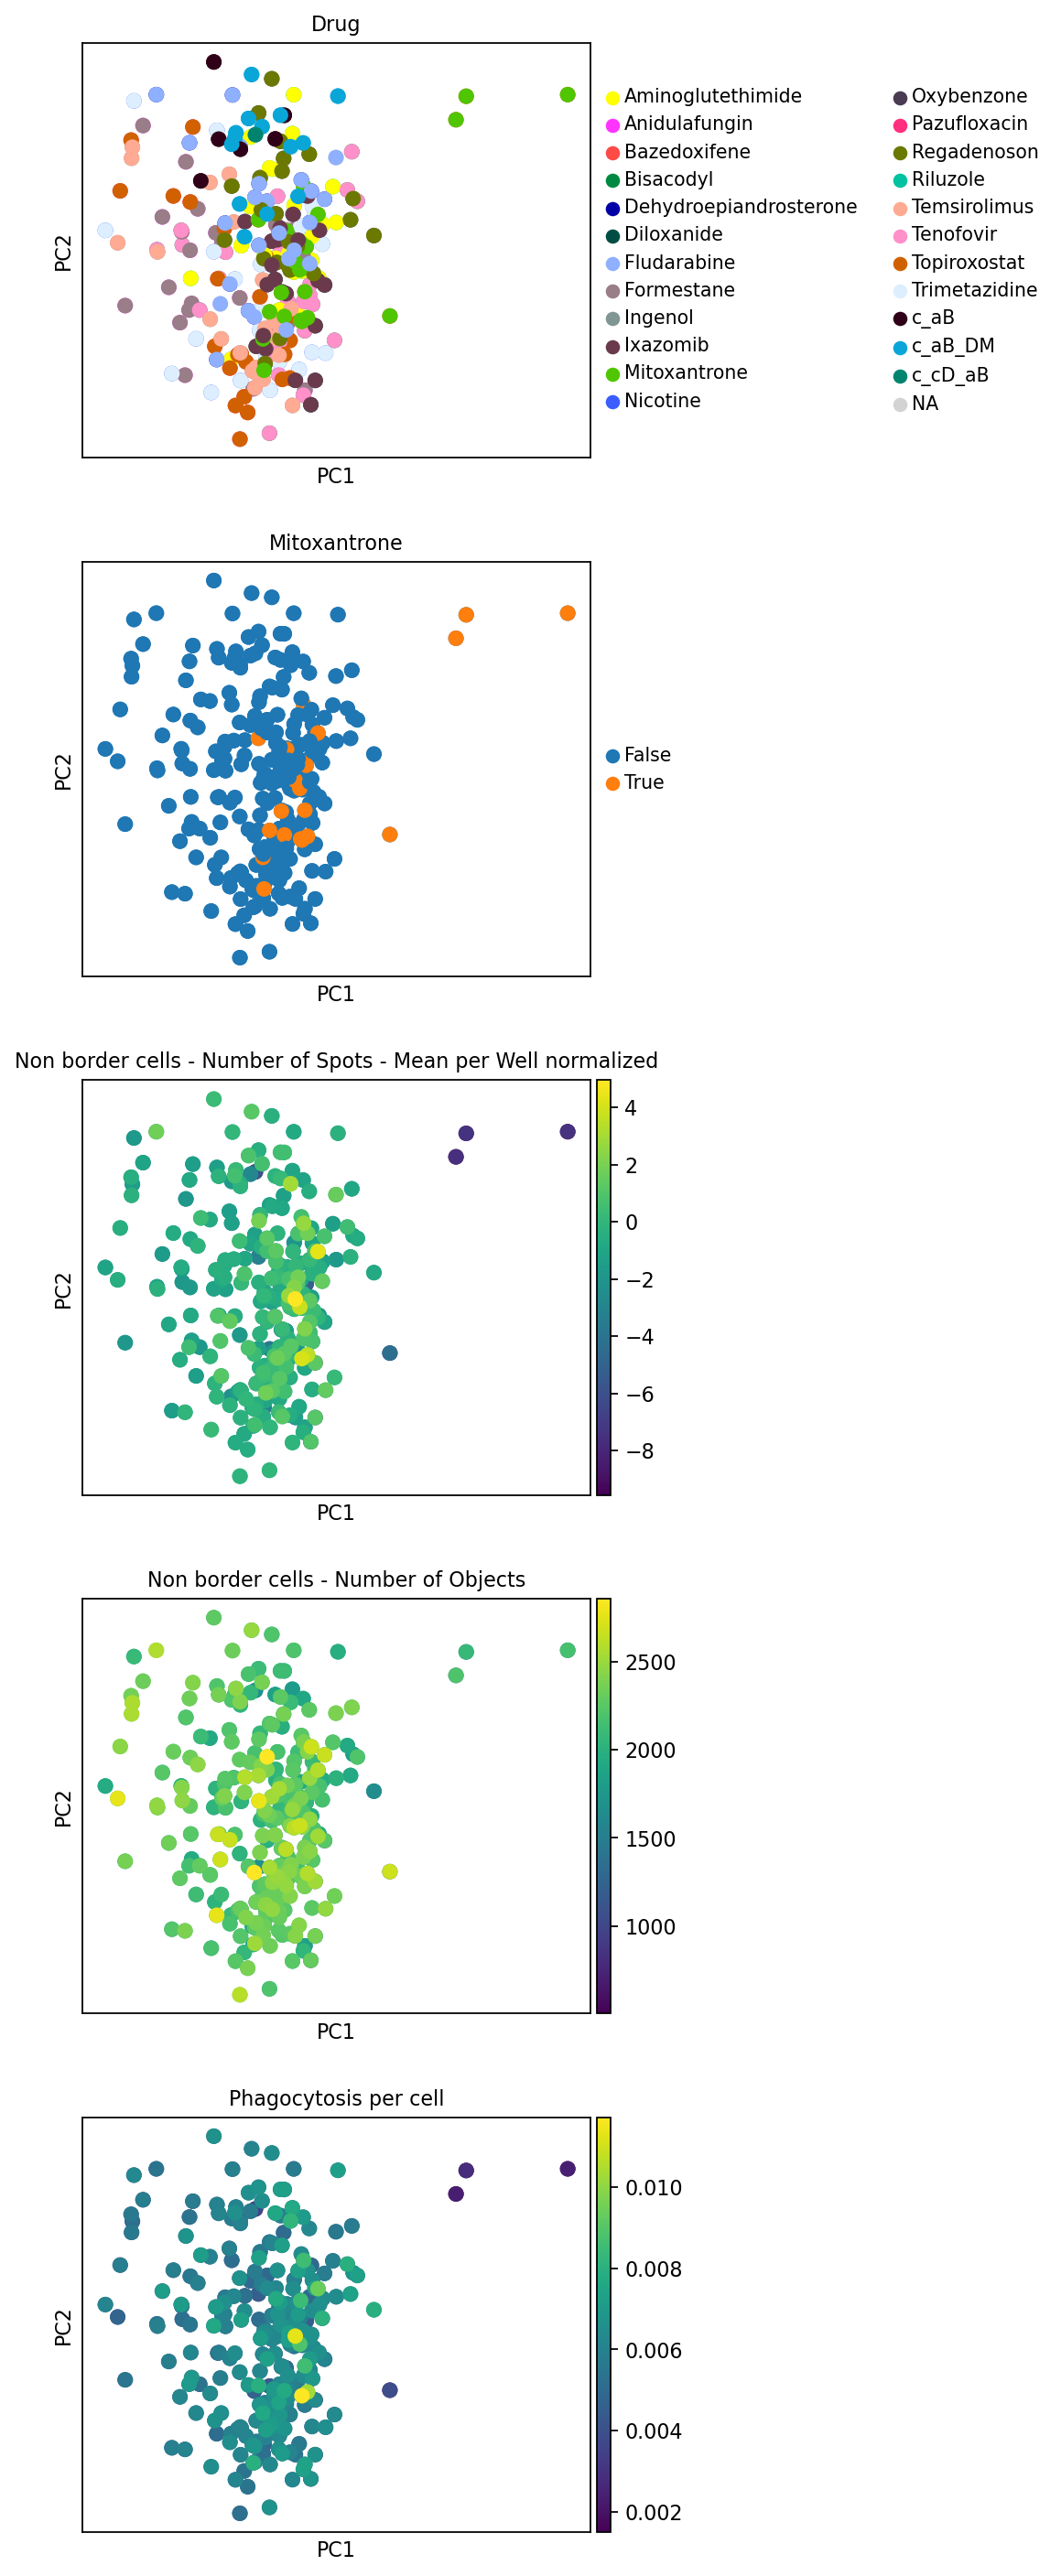

In [33]:
sc.pl.pca(adata0, color=[
        "Drug", "Mitoxantrone", phago_key, "Non border cells - Number of Objects", "Phagocytosis per cell",
    ], 
    ncols=1,
)

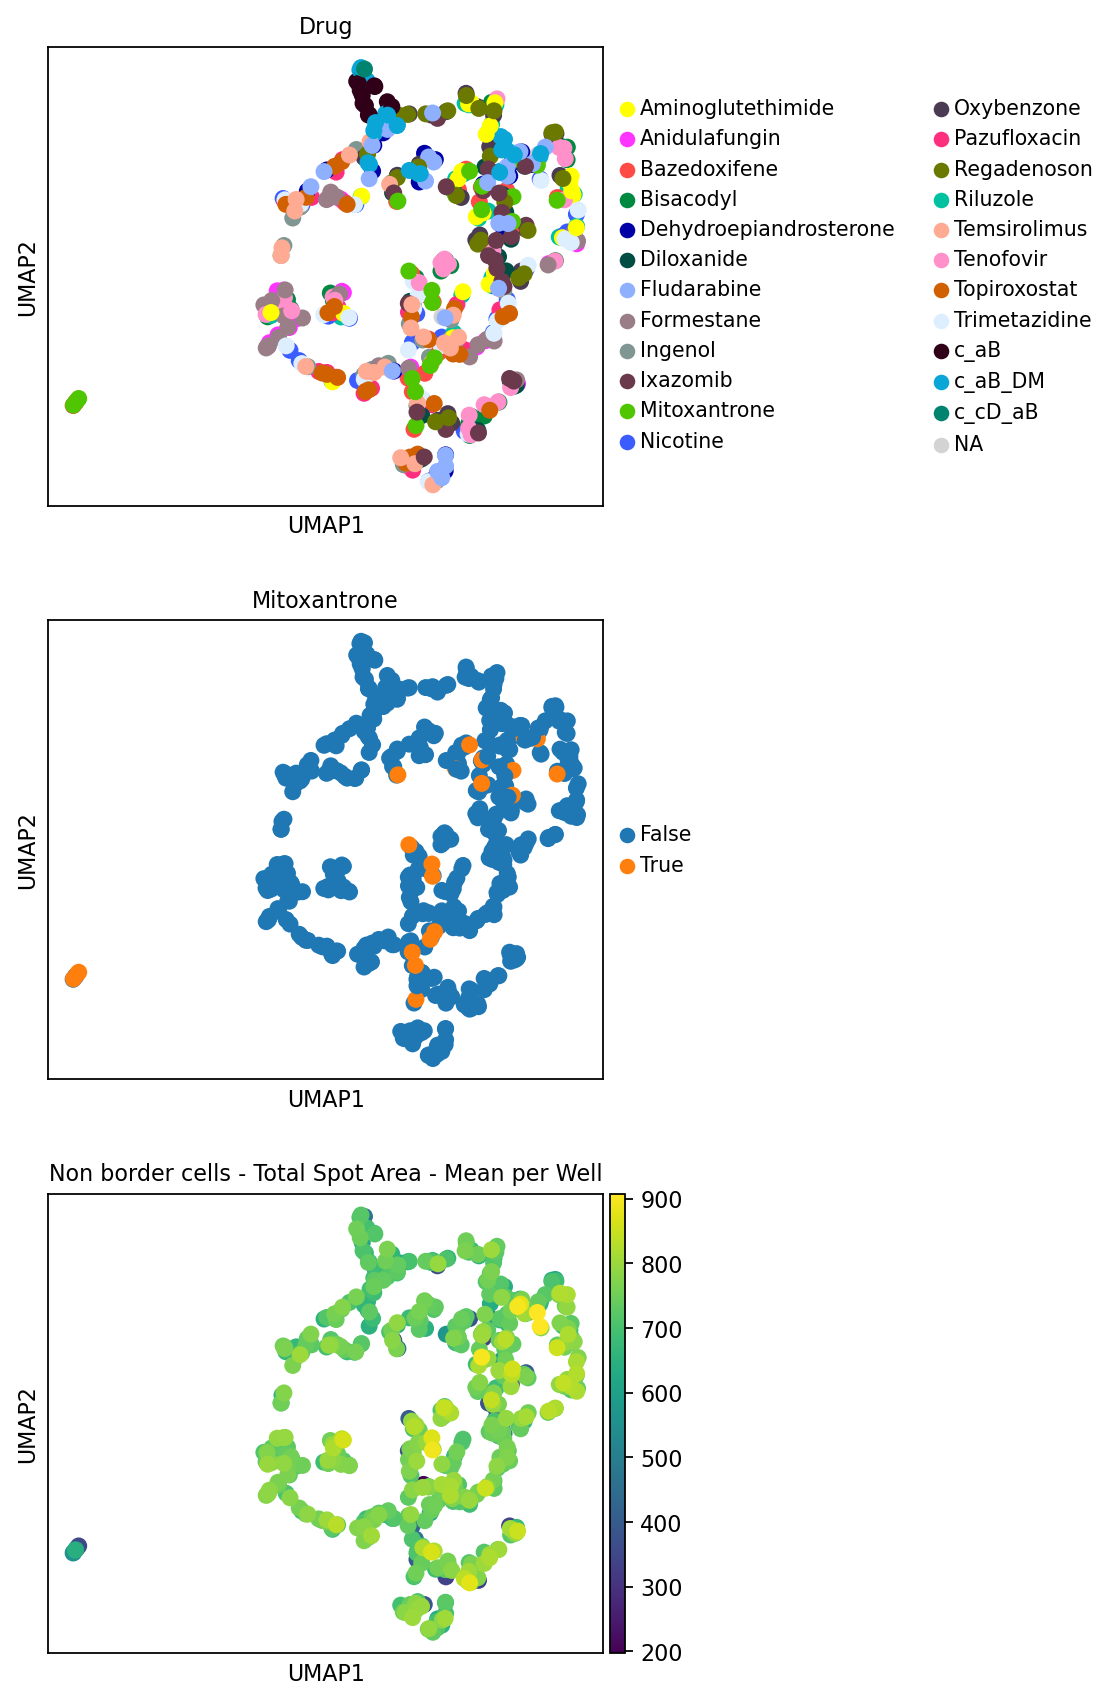

In [34]:
sc.pl.umap(adata0, color=["Drug", "Mitoxantrone", "Non border cells - Total Spot Area - Mean per Well"], ncols=1)